In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Titanic Project

In [3]:
# Create a dataframe for train data file
titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Questions to answer:
1.) Who were the passengers on the Titanic? (Age, Gender, Class, etc.

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

5.) what factors helped someone survive the sinking?

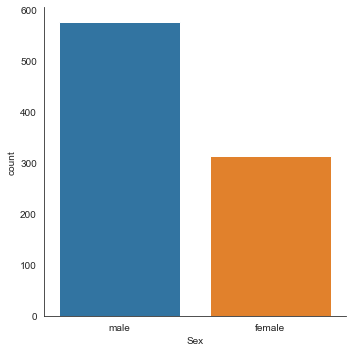

In [6]:
sns.factorplot('Sex', data = titanic_df, kind = 'count')

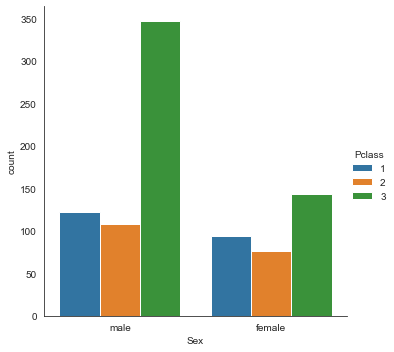

In [7]:
sns.factorplot('Sex', data = titanic_df, hue ='Pclass', kind = 'count')

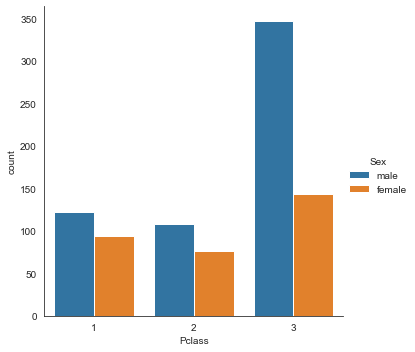

In [8]:
sns.factorplot('Pclass', data = titanic_df, hue ='Sex', kind = 'count')

In [9]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [11]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


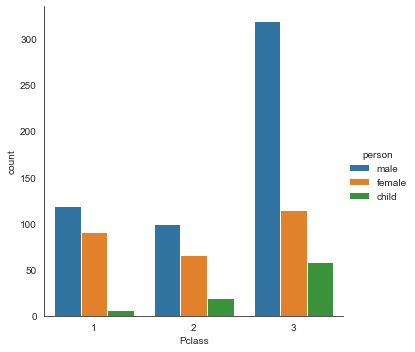

In [12]:
sns.factorplot('Pclass', data = titanic_df, hue ='person', kind = 'count')

<AxesSubplot:>

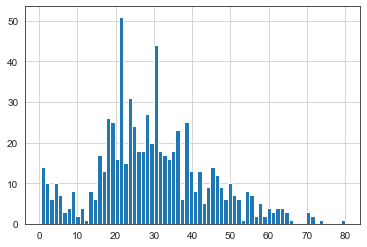

In [13]:
titanic_df['Age'].hist(bins = 70)

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

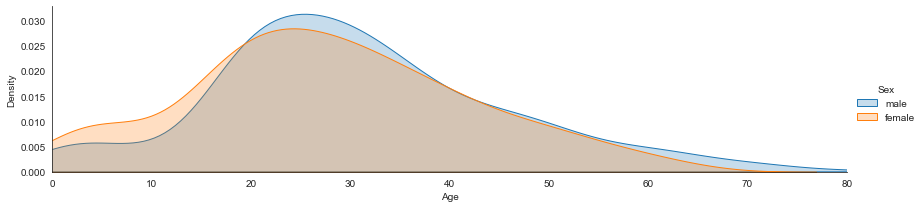

In [16]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect =4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0, oldest))
fig.add_legend()

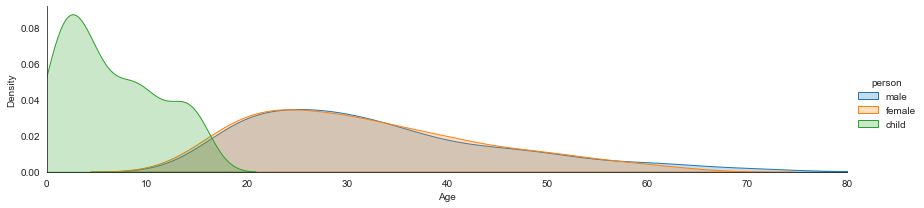

In [17]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect =4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0, oldest))
fig.add_legend()

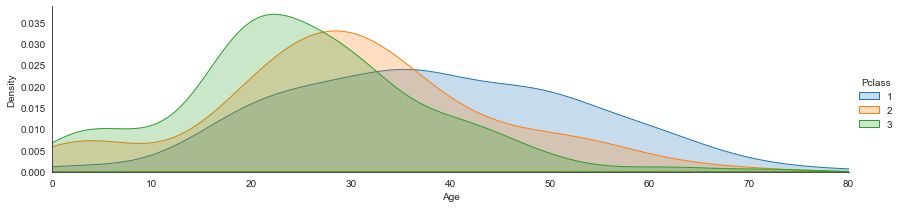

In [18]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect =4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0, oldest))
fig.add_legend()

In [19]:
deck = titanic_df['Cabin'].dropna()

In [20]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

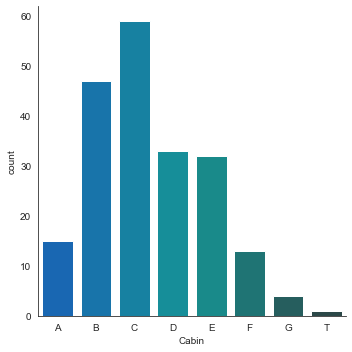

In [30]:
levels =[]
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df.sort_values('Cabin'), kind ='count', palette = 'winter_d')

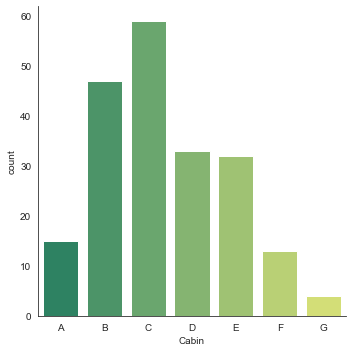

In [29]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin', data = cabin_df, kind ='count', palette = 'summer',order = list('ABCDEFG'))

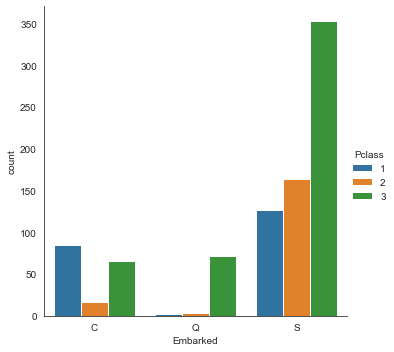

In [32]:
sns.factorplot('Embarked', data = titanic_df, kind = 'count', hue = 'Pclass', order = ['C','Q','S'])

In [33]:
# Who was alone and who was with family?
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [34]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [35]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


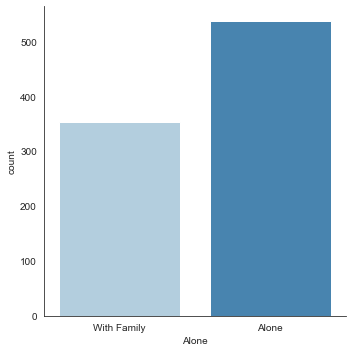

In [37]:
sns.factorplot('Alone', data = titanic_df, kind = 'count', palette = 'Blues')

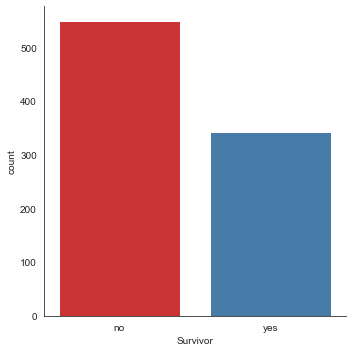

In [38]:
# Which factors affect the survival rate?

titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

sns.factorplot('Survivor', data = titanic_df, kind = 'count', palette ='Set1')

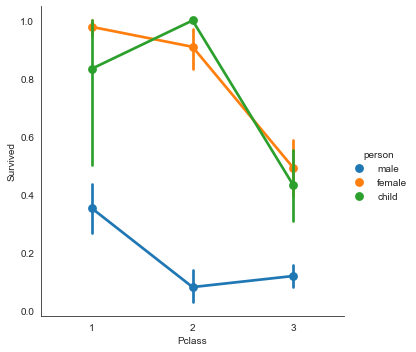

In [41]:
sns.factorplot('Pclass', 'Survived', hue = 'person',data = titanic_df)

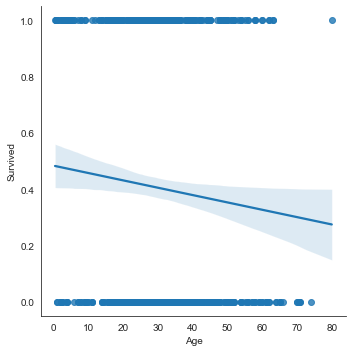

In [42]:
sns.lmplot('Age', 'Survived', data = titanic_df)

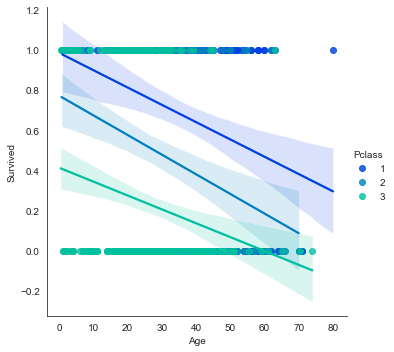

In [43]:
sns.lmplot('Age', 'Survived', hue = 'Pclass',data = titanic_df, palette = 'winter')

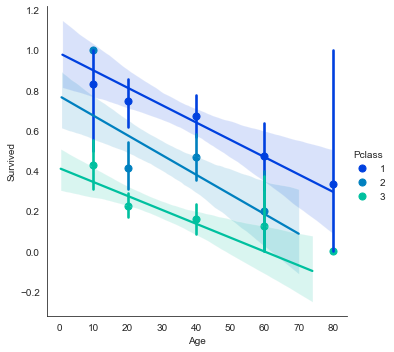

In [44]:
generation = [10,20,40,60,80]

sns.lmplot('Age', 'Survived', data = titanic_df, hue ='Pclass', palette ='winter', x_bins = generation)

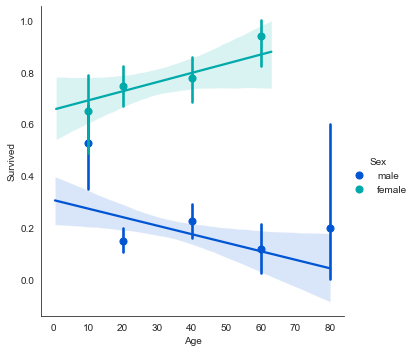

In [45]:
sns.lmplot('Age', 'Survived', data = titanic_df, hue ='Sex', palette ='winter', x_bins = generation)

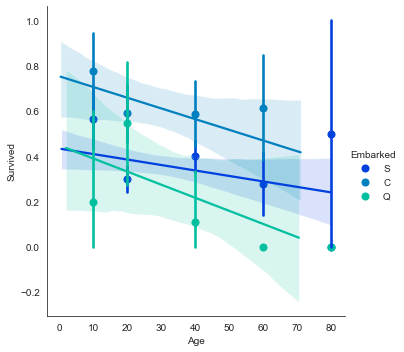

In [52]:
# Did the deck have an effect on the passengers survival rate?
sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Embarked', palette ='winter', x_bins = generation)

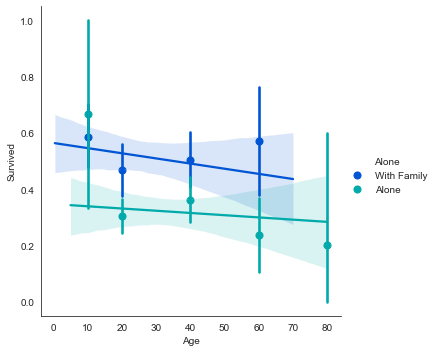

In [48]:
# Did having a family member increase the odds of surviving the crash?
sns.lmplot('Age', 'Survived', data = titanic_df, hue ='Alone', palette ='winter', x_bins = generation)

### Stock Market Analysis

#### Questions to answer:
1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?


In [2]:
from pandas_datareader import data
from datetime import datetime

In [3]:
tech_list = ['AAPL','GOOG', 'MSFT','AMZN']

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
    globals()[stock] = data.get_data_yahoo(stock, start, end)

In [9]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-08,2284.004883,2257.679932,2277.959961,2265.439941,1358300,2265.439941
2021-04-09,2289.040039,2253.714111,2256.699951,2285.879883,1044400,2285.879883
2021-04-12,2275.320068,2238.465088,2266.250000,2254.790039,1565900,2254.790039
2021-04-13,2277.209961,2256.090088,2261.469971,2267.270020,1165500,2267.270020
2021-04-14,2277.989990,2249.189941,2275.159912,2254.840088,1011000,2254.840088


In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,153.082734,149.956745,151.415804,151.626392,8.663972e+07,151.268226
std,16.552290,15.819085,16.201335,16.224719,2.568574e+07,16.412601
min,124.639999,122.250000,123.160004,122.769997,2.140839e+07,122.251930
25%,142.225006,139.154999,140.655006,141.305000,6.893510e+07,140.919533
50%,150.179993,147.850006,149.000000,149.100006,8.277270e+07,148.623459
75%,167.620003,162.979996,165.244995,165.310005,9.899055e+07,165.114822
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-04-08 to 2022-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       255 non-null    float64
 1   Low        255 non-null    float64
 2   Open       255 non-null    float64
 3   Close      255 non-null    float64
 4   Volume     255 non-null    float64
 5   Adj Close  255 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

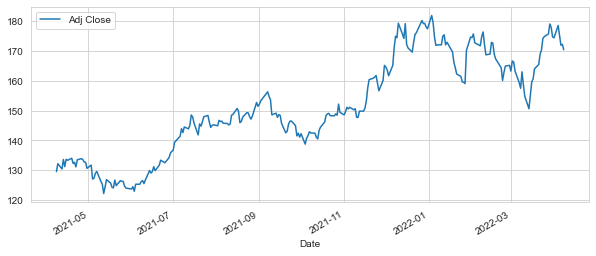

In [12]:
AAPL['Adj Close'].plot(legend = True, figsize =(10,4))

<AxesSubplot:xlabel='Date'>

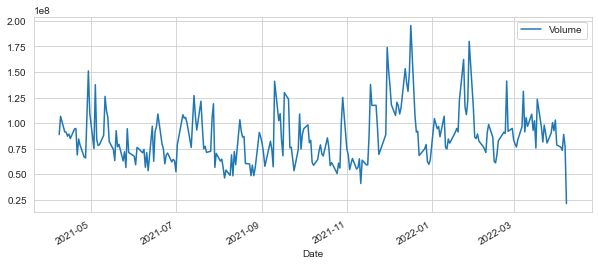

In [13]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

In [6]:
# Moving Average
ma_day =[10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

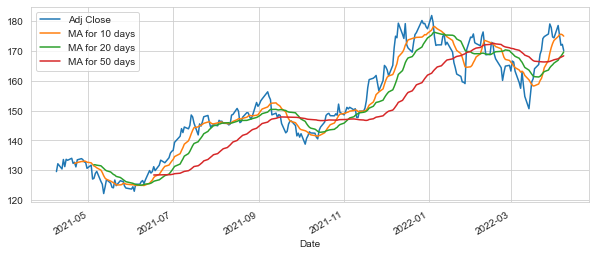

In [7]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

<AxesSubplot:xlabel='Date'>

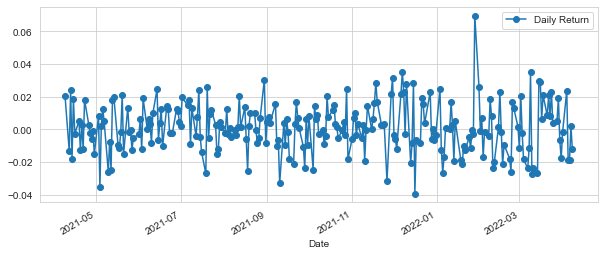

In [8]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend = True, figsize = (10,4), marker = "o")

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

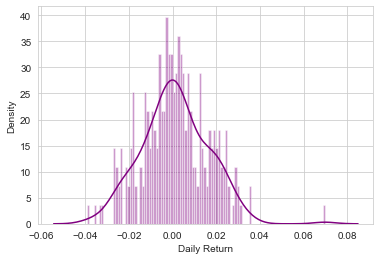

In [9]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

<AxesSubplot:>

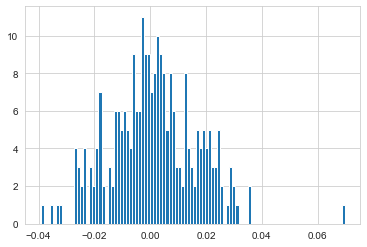

In [23]:
AAPL['Daily Return'].hist(bins = 100)

In [10]:
closing_df = data.get_data_yahoo(tech_list, start, end)['Adj Close']

In [25]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-08,129.589783,2265.439941,251.203842,3299.300049
2021-04-09,132.214188,2285.879883,253.782837,3372.199951
2021-04-12,130.464600,2254.790039,253.842331,3379.389893
2021-04-13,133.635727,2267.270020,256.401459,3400.000000
2021-04-14,131.249908,2254.840088,253.524918,3333.000000


In [11]:
tech_ret = closing_df.pct_change()

In [27]:
tech_ret.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-08,NaN,NaN,NaN,NaN
2021-04-09,0.020252,0.009023,0.010267,0.022096
2021-04-12,-0.013233,-0.013601,0.000234,0.002132
2021-04-13,0.024306,0.005535,0.010082,0.006099
2021-04-14,-0.017853,-0.005482,-0.011219,-0.019706


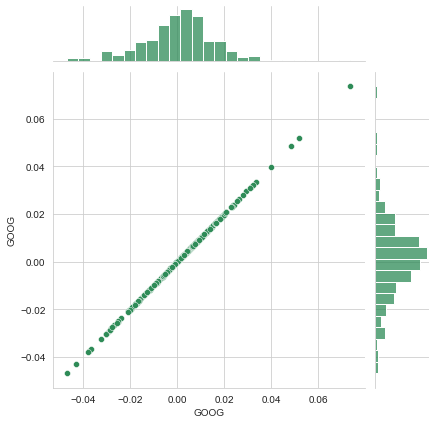

In [30]:
sns.jointplot('GOOG','GOOG', tech_ret, kind = 'scatter', color ='seagreen')

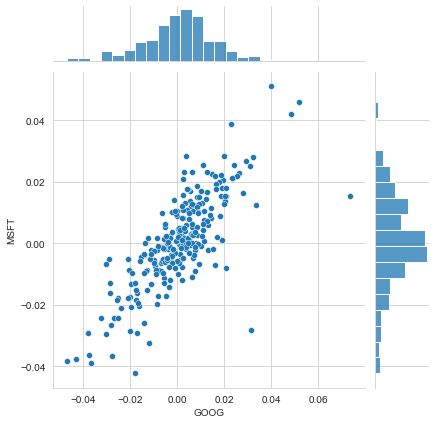

In [36]:
sns.jointplot('GOOG','MSFT', tech_ret, kind ='scatter')


In [12]:
tech_ret.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-08,NaN,NaN,NaN,NaN
2021-04-09,0.020252,0.009023,0.010267,0.022096
2021-04-12,-0.013233,-0.013601,0.000234,0.002132
2021-04-13,0.024306,0.005535,0.010082,0.006099
2021-04-14,-0.017853,-0.005482,-0.011219,-0.019706


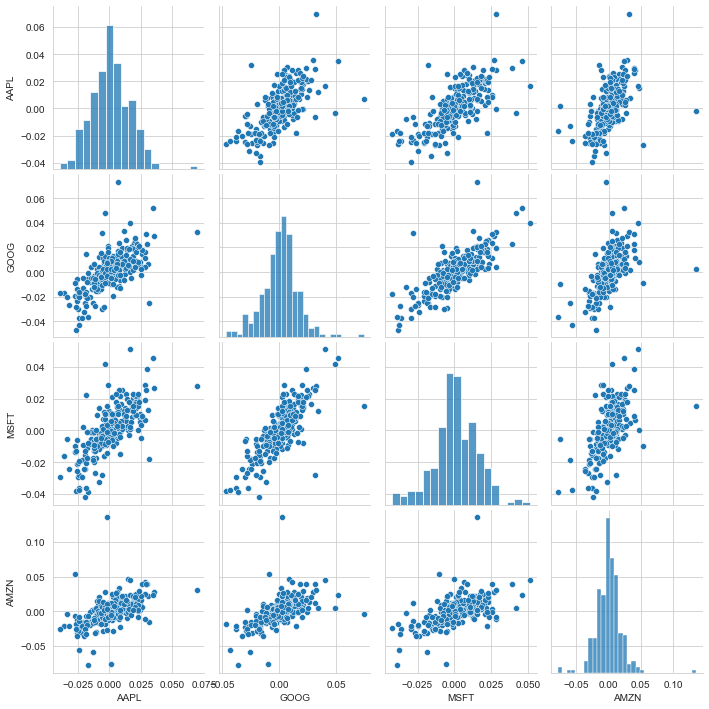

In [13]:
sns.pairplot(tech_ret.dropna())

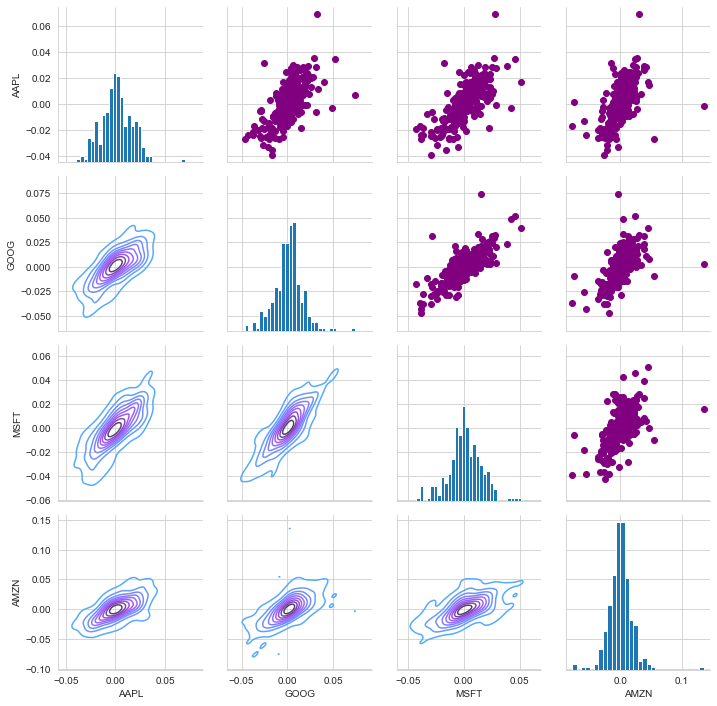

In [15]:
return_fig = sns.PairGrid(tech_ret.dropna())

return_fig.map_upper(plt.scatter, color ='purple')

return_fig.map_lower(sns.kdeplot, cmap ='cool_d')

return_fig.map_diag(plt.hist, bins = 30)


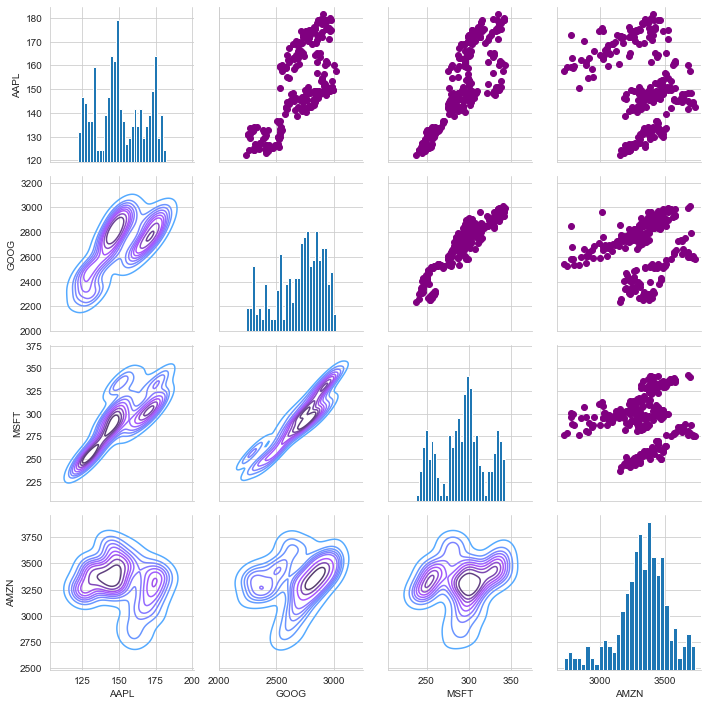

In [16]:
return_fig = sns.PairGrid(closing_df.dropna())

return_fig.map_upper(plt.scatter, color ='purple')

return_fig.map_lower(sns.kdeplot, cmap ='cool_d')

return_fig.map_diag(plt.hist, bins = 30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

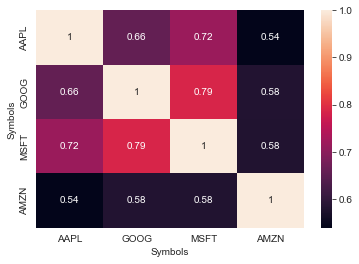

In [19]:
sns.heatmap(tech_ret.corr().dropna(), annot = True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

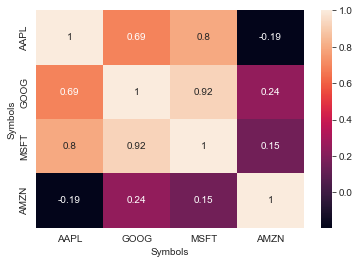

In [20]:
sns.heatmap(closing_df.corr().dropna(), annot = True)

##### Risk Analysis


In [21]:
rets = tech_ret.dropna()

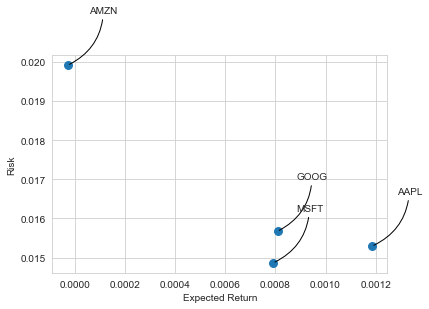

In [23]:
area = np.pi * 20

plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = "offset points", ha = "right", va ="bottom",
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color ='black'))

#### Value at Risk

##### Value at risk using the "bootstrap" method

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

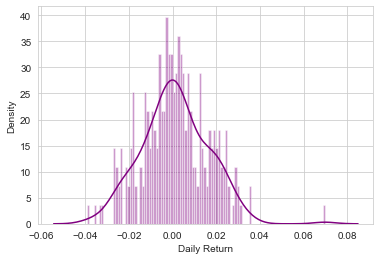

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [25]:
rets['AAPL'].quantile(0.05)

-0.02415265318941807

The 0.05 empirical quantile of daily returns is at -0.024. That means that with 95% confidence, the worst daily loss will not exceed 2.4%. If you have a 1 million dollar investment, one-day 5% VAR is 0.024 * 1,000,000 = $24,000


##### Value at Risk using the Monte Carlo method

In [26]:
days = 365

dt = 1/ days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [27]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu *dt, scale = sigma* np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price
    

In [28]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-08,2284.004883,2257.679932,2277.959961,2265.439941,1358300,2265.439941
2021-04-09,2289.040039,2253.714111,2256.699951,2285.879883,1044400,2285.879883
2021-04-12,2275.320068,2238.465088,2266.250000,2254.790039,1565900,2254.790039
2021-04-13,2277.209961,2256.090088,2261.469971,2267.270020,1165500,2267.270020
2021-04-14,2277.989990,2249.189941,2275.159912,2254.840088,1011000,2254.840088


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

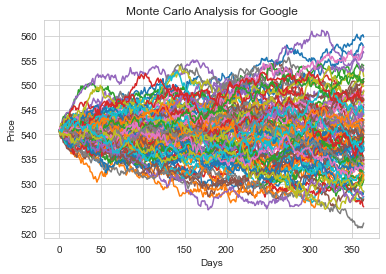

In [29]:
start_price = 540.74
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis for Google")

In [30]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]

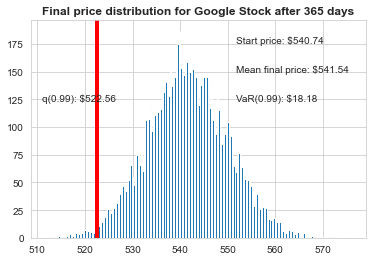

In [31]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

#Starting price
plt.figtext(0.6, 0.8, s = "Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" %(start_price -q,))

# Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth = 4, color ='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" %days, weight = 'bold');

### Additional questions to answer:
1.) Estimate the values at risk using both methods for a stock not related to technology

2.) Build a practice portfolio and see how well you can predict risk values with real stock information!

3.) Look further into correlation of two stocks and see if that gives you any insight into future possible stock prices.

## Election Analysis

### Questions to answer:
1.) Who was being polled and what was their party affiliation?

2.) Did the poll results favor Romney or Obama?

3.) How do undecided voters effect the poll?

4.) Can we account for the undecided voters?

5.) How did voter sentiment change over time?

6.) Can we see an effect in the polls from the debates?

In [2]:
import requests
from io import StringIO

In [3]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use request to get the information in text form

source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas

poll_data = StringIO(source)

In [4]:
poll_df = pd.read_csv(poll_data)
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [5]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


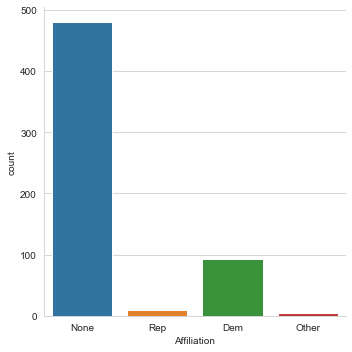

In [6]:
sns.factorplot("Affiliation", data = poll_df, kind ='count')

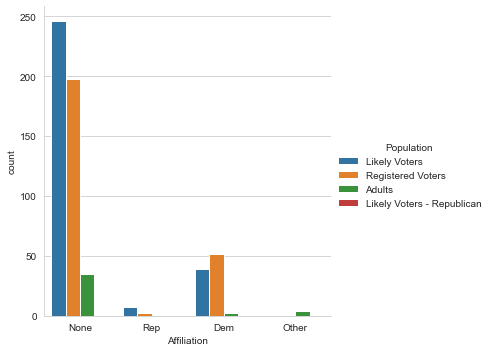

In [7]:
sns.factorplot('Affiliation', data = poll_df, kind ='count', hue ='Population')

In [8]:
avg = pd.DataFrame(poll_df.mean())
avg.drop(['Number of Observations','Other','Question Text','Question Iteration'], axis = 0, inplace = True)

In [9]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [10]:
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations','Other','Question Text','Question Iteration'], axis = 0, inplace = True)

In [11]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


<AxesSubplot:>

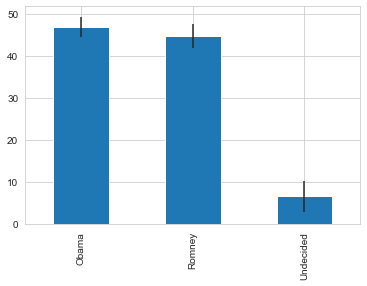

In [12]:
avg.plot(yerr = std, kind ='bar', legend = False)

In [13]:
poll_avg = pd.concat([avg,std], axis = 1)
poll_avg

,0,0
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [14]:
poll_avg.columns=['Average','STD']

In [15]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [16]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


<AxesSubplot:xlabel='End Date'>

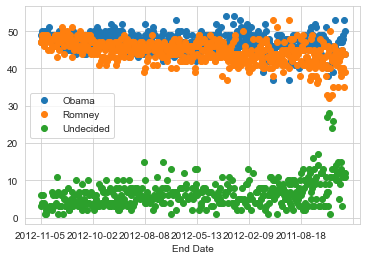

In [17]:
poll_df.plot(x = 'End Date', y = ['Obama', 'Romney','Undecided'], linestyle ='', marker ='o')

In [18]:
from datetime import datetime

In [19]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney) / 100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [20]:
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1.0,0.09


<AxesSubplot:xlabel='Start Date'>

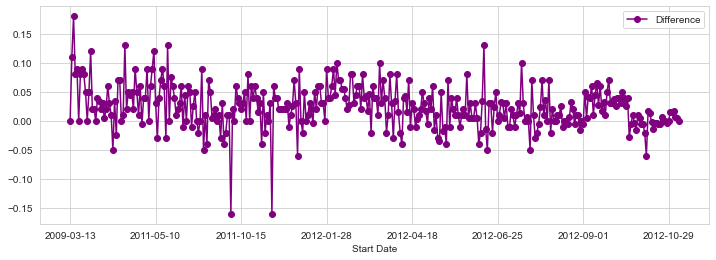

In [21]:
poll_df.plot('Start Date','Difference', figsize = (12,4), marker ='o', linestyle ='-', color = 'purple')

In [22]:
row_in = 0
xlimit =[]
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
print(min(xlimit))
print(max(xlimit))

325
352


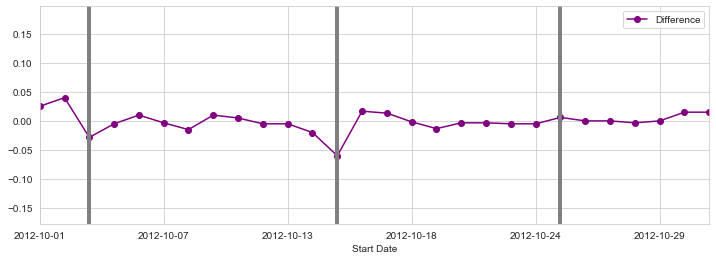

In [28]:
poll_df.plot('Start Date','Difference', figsize = (12,4), marker ='o', linestyle ='-', color = 'purple', xlim = (325,352))
# Oct 3rd
plt.axvline(x = 325 + 2, linewidth =4,color ='grey')
# Oct 15th
plt.axvline(x = 325 + 12, linewidth =4,color ='grey')
#Oct 22nd
plt.axvline(x = 325 + 21, linewidth =4,color ='grey')

#### Donor Data Set

##### Questions to answer:
1.) How much was donated and what was the average donation?

2.) How did the donations differ between candidates?

3.) How did the donations differ between Democrats and Republicans?

4.) What were the demographics of the donors?

5.) Is there a pattern to donation amounts?

In [29]:
donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [30]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [31]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [32]:
donor_mean = donor_df['contb_receipt_amt'].mean()
donor_std = donor_df['contb_receipt_amt'].std()

print("The average donation was: %.2f with a std %.2f" %(donor_mean, donor_std))


The average donation was: 298.24 with a std 3749.67


In [34]:
top_donor = donor_df['contb_receipt_amt'].copy().sort_values()
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [35]:
top_donor = top_donor[top_donor >0]

In [37]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

<AxesSubplot:>

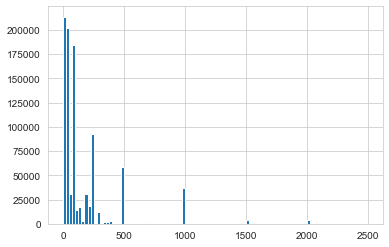

In [39]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins = 100)

In [40]:
candidate = donor_df.cand_nm.unique()

candidate

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [41]:
# Seperate Obama from the Republican Candidates by adding a Party Affiliation column, using a map along a dictionary of party affiliations.

party_map = {'Bachmann, Michelle': 'Republican',
            'Cain, Herman': 'Republican',
            'Gingrich, Newt': 'Republican',
            'Huntsman, Jon': 'Republican',
            'Johnson, Gary Earl': 'Republican',
            'McCotter, Thaddeus G': 'Republican',
            'Obama, Barack': 'Democrat',
            'Paul, Ron': 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Perry, Rick': 'Republican',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
            'Romney, Mitt': 'Republican',
            'Santorum, Rick': 'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [44]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [45]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [46]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [47]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0
for don in cand_amount:
    print("The candidate %s raise %.0f dollars" %(cand_amount.index[i],don))
    print('\n')
    i+=1

The candidate Bachmann, Michelle raise 2711439 dollars


The candidate Cain, Herman raise 7101082 dollars


The candidate Gingrich, Newt raise 12832770 dollars


The candidate Huntsman, Jon raise 3330373 dollars


The candidate Johnson, Gary Earl raise 566962 dollars


The candidate McCotter, Thaddeus G raise 39030 dollars


The candidate Obama, Barack raise 135877427 dollars


The candidate Paul, Ron raise 21009620 dollars


The candidate Pawlenty, Timothy raise 6004819 dollars


The candidate Perry, Rick raise 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars


The candidate Romney, Mitt raise 88335908 dollars


The candidate Santorum, Rick raise 11043159 dollars




<AxesSubplot:ylabel='cand_nm'>

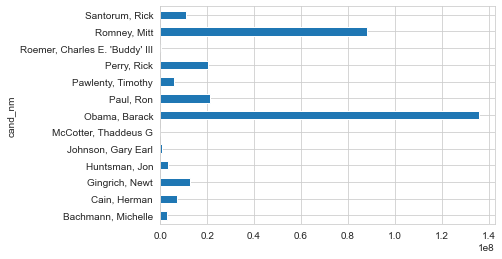

In [51]:
cand_amount.plot(kind ='barh')

<AxesSubplot:xlabel='Party'>

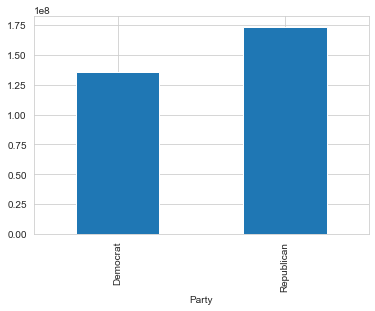

In [52]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind = 'bar')

In [53]:
occupation_df = donor_df.pivot_table('contb_receipt_amt', index = 'contbr_occupation',
                                    columns ='Party', aggfunc = 'sum')

In [54]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [56]:
occupation_df.shape

(45067, 2)

In [57]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [58]:
occupation_df.shape

(31, 2)

<AxesSubplot:ylabel='contbr_occupation'>

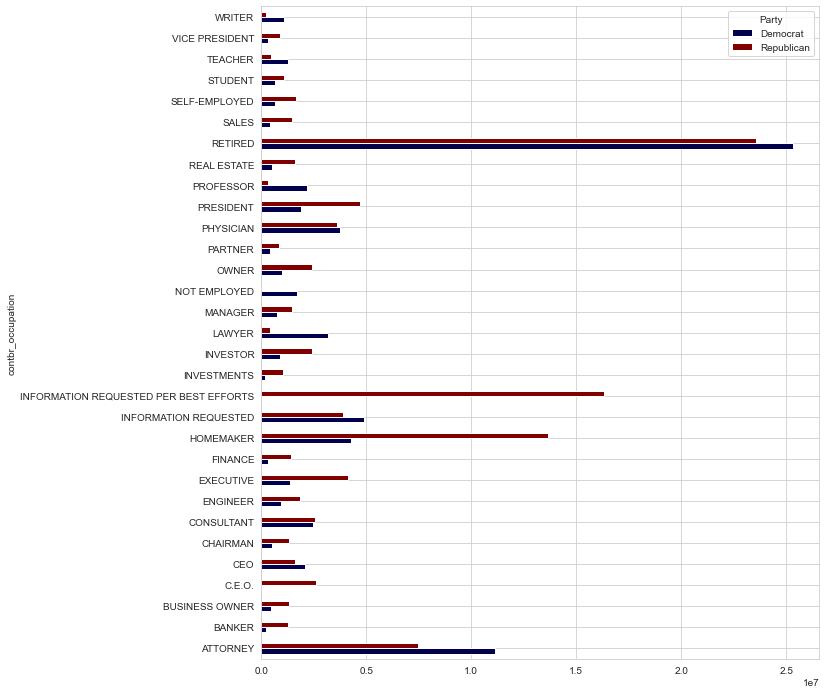

In [61]:
occupation_df.plot(kind = 'barh', figsize = (10,12), cmap = 'seismic')

In [62]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'], axis = 0, inplace  = True)

In [63]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.', inplace = True)

<AxesSubplot:ylabel='contbr_occupation'>

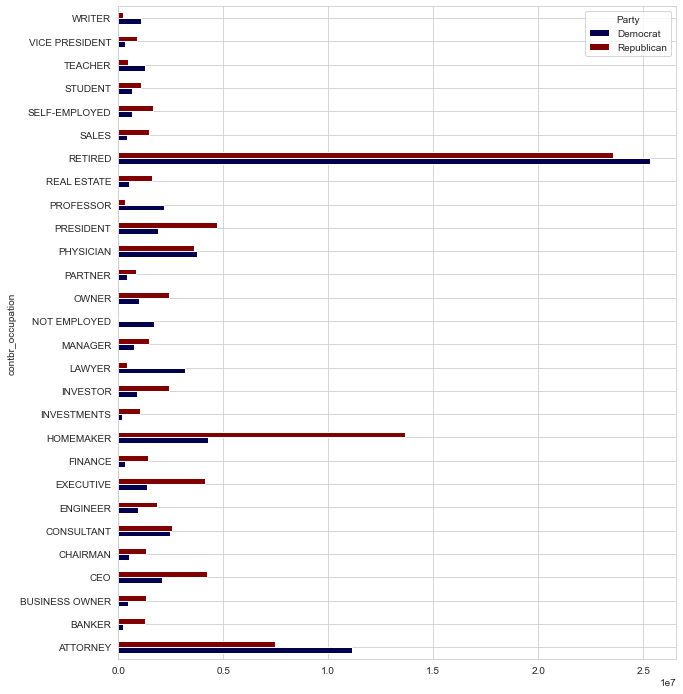

In [64]:
occupation_df.plot(kind = 'barh', figsize = (10, 12), cmap = 'seismic')